# RNN_Regression
This notebook uses an RNN to predict the google stock price, based only on previous values of the timeseries.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [0]:
# Loading data and grabbing the column "Open"
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[: , 1:2].values

In [0]:
# Normalizing data
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

print(training_set_scaled.shape)

(1258, 1)


In [0]:
# Creating the each training instance as the 60 previous values of the timeseries and for its target 
# the next value of the series
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train) 
y_train = np.array(y_train) 


In [0]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [0]:
# Creating the RNN model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [0]:
# Trainning the model
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0484 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0066 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0049 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/ste

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018 - acc: 0.0017
Epoch 82/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014 - acc: 0.0017
Epoch 83/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0018 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0016 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017 - acc: 0.0017
Epoch 88/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0015 - acc: 0.0017
Epoch 89/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0014 - acc: 0.0017
Epoch 90/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014 - acc: 0.0017
Epoch 91/100
1198/1198 

In [0]:
# Loading test data
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[: , 1:2].values

In [0]:
# Concatinating train and test data, inorder for the first 60 values of the test time series, to be able 
# to find their 60 previous values in the dataset.
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
# Creating the test instances in the same way as before
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)  
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Predicting the time series
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<function matplotlib.pyplot.show(*args, **kw)>

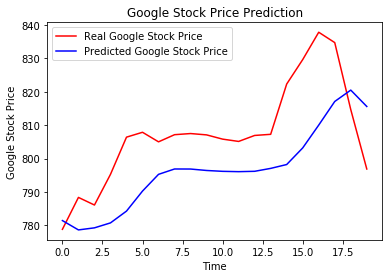

In [0]:
# Visualizing the true and the predicted time series
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show